In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset for Kyoto
kyoto = pd.read_csv('data/kyoto.csv')

In [3]:
# Loading the dataset for Liestal
liestal = pd.read_csv('data/liestal.csv')

In [4]:
# Loading the dataset for Washington DC
washingtondc = pd.read_csv('data/washingtondc.csv')
washingtondc.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,washingtondc,38.88535,-77.038628,0,1921,1921-03-20,79
1,washingtondc,38.88535,-77.038628,0,1922,1922-04-07,97
2,washingtondc,38.88535,-77.038628,0,1923,1923-04-09,99
3,washingtondc,38.88535,-77.038628,0,1924,1924-04-13,104
4,washingtondc,38.88535,-77.038628,0,1925,1925-03-27,86


In [5]:
all_countries = pd.concat([washingtondc, kyoto, liestal])
top_cities = all_countries['location'].value_counts().index[0:3].to_list()

In [6]:
all_countries.shape

(1062, 7)

In [7]:
all_countries.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,washingtondc,38.88535,-77.038628,0,1921,1921-03-20,79
1,washingtondc,38.88535,-77.038628,0,1922,1922-04-07,97
2,washingtondc,38.88535,-77.038628,0,1923,1923-04-09,99
3,washingtondc,38.88535,-77.038628,0,1924,1924-04-13,104
4,washingtondc,38.88535,-77.038628,0,1925,1925-03-27,86


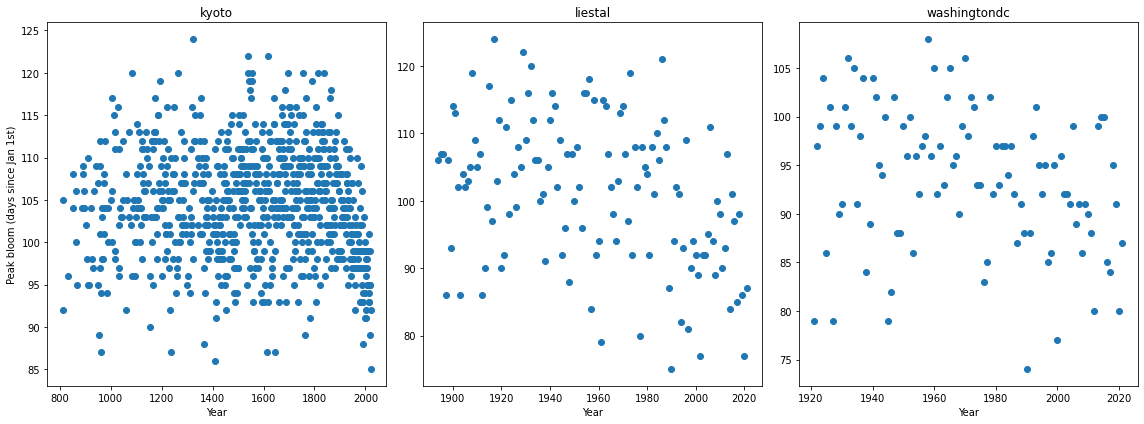

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
ax[0].plot(all_countries[all_countries['location'] == top_cities[0]]['year'], 
              all_countries[all_countries['location'] == top_cities[0]]['bloom_doy'], 'o')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Peak bloom (days since Jan 1st)')
ax[0].set_title(top_cities[0])
ax[1].plot(all_countries[all_countries['location'] == top_cities[1]]['year'], 
              all_countries[all_countries['location'] == top_cities[1]]['bloom_doy'], 'o')
ax[1].set_xlabel('Year')
ax[1].set_title(top_cities[1])
ax[2].plot(all_countries[all_countries['location'] == top_cities[2]]['year'], 
              all_countries[all_countries['location'] == top_cities[2]]['bloom_doy'], 'o')
ax[2].set_xlabel('Year')
ax[2].set_title(top_cities[2])
plt.tight_layout()

In [9]:
X = all_countries.drop(['bloom_doy', 'bloom_date', 'year'], axis=1)
Y = all_countries['bloom_doy']
X = pd.get_dummies(X, columns=['location'])
X.head()

,lat,long,alt,location_kyoto,location_liestal,location_washingtondc
0,38.88535,-77.038628,0,0,0,1
1,38.88535,-77.038628,0,0,0,1
2,38.88535,-77.038628,0,0,0,1
3,38.88535,-77.038628,0,0,0,1
4,38.88535,-77.038628,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
test_predictions = model.predict(X_test).round().astype('int')

In [15]:
model.coef_

array([-8.58251523e-04,  4.38157107e-02,  7.08275857e-03,  2.08357372e-04,
       -5.95704509e-06, -2.02400326e-04])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [17]:
# Calculating the Mean Absolute Error
mean_absolute_error(Y_test, test_predictions)

5.579937304075235

In [18]:
Y_test

88     104
664    102
254    111
166    116
647    114
      ... 
54     116
686     99
5       93
540    104
77      86
Name: bloom_doy, Length: 319, dtype: int64

In [19]:
# Predicted values
test_predictions

array([104, 104, 104, 104, 104, 104, 104, 101, 104, 101, 104,  95, 104,
       104, 104, 104, 104, 104,  95, 101, 101, 104, 104, 104, 104, 104,
       104, 104, 101, 101, 104, 104, 104, 104, 104,  95, 101, 104, 104,
       101, 104, 104, 104, 101, 104, 101,  95, 104, 104, 101, 101, 104,
       104, 104, 104, 104, 104, 101, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 101, 104, 104, 104, 104, 104, 104, 104,
       104,  95, 104, 104,  95,  95,  95,  95, 104,  95,  95, 104, 104,
        95, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 101, 104, 104, 101, 104, 104,  95, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 101, 104, 104, 101, 104,
       104, 104, 104, 104, 101, 104,  95, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 101, 104, 101, 104, 104,  95,
       104, 104, 104, 104,  95, 104, 104, 104, 104, 104, 104, 101, 104,
       101, 104, 104, 104, 101, 104, 104, 104, 101, 104, 104, 10

In [20]:
# Calculating the mean squared error
mean_squared_error(Y_test, test_predictions)

50.877742946708466

In [21]:
# Calculating the root mean squared error, RMSE
np.sqrt(mean_squared_error(Y_test, test_predictions))

7.1328635867166605

In [22]:
test_residuals = Y_test - test_predictions

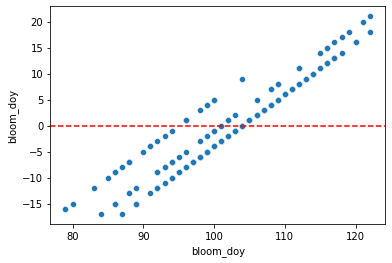

In [23]:
# residual plot
sns.scatterplot(x=Y_test, y=test_residuals)
plt.axhline(y=0, c='red', ls='--')

In [24]:
model.intercept_

97.96170962197161

In [25]:
test_predictions = [round(pred) for pred in test_predictions]
avg_no_of_days = round(np.mean(test_predictions))

In [26]:
avg_no_of_days

103

In [27]:
print('The earliest predicted blossom date: ', min(test_predictions))

The earliest predicted blossom date:  95


In [28]:
print('The latest predicted blossom date: ', max(test_predictions))

The latest predicted blossom date:  104
